# K-Nearest Neighbors Demo with Iris Dataset

This notebook demonstrates the usage of our KNN implementation on the famous Iris dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

from knn import KNearestNeighbors

## Load and Prepare Data

In [8]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (75, 4)
Testing set shape: (75, 4)


## Train and Evaluate KNN Model

In [9]:
# Initialize and train KNN
knn = KNearestNeighbors(k=3)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


## Visualize Results

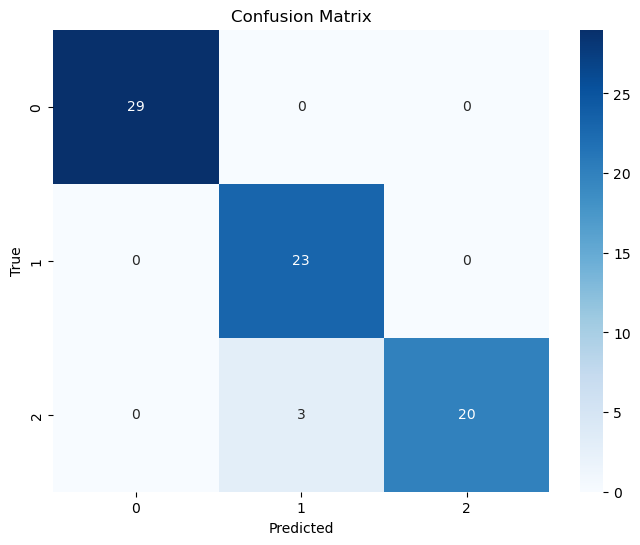

In [10]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Visualize Decision Boundaries (2D)

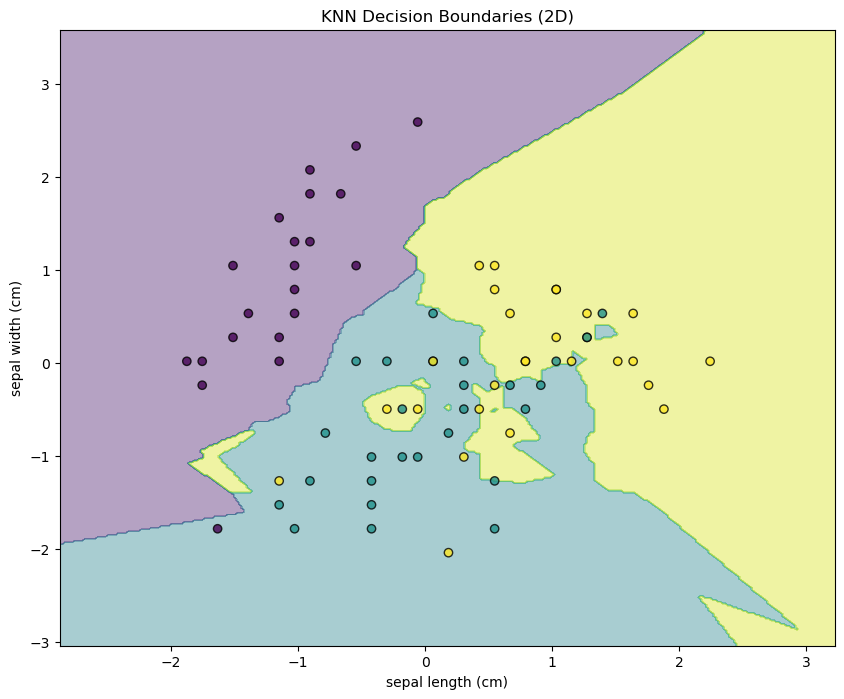

In [11]:
# Select two features for visualization
feature1, feature2 = 0, 1  # Sepal length and width

# Create mesh grid
x_min, x_max = X_train_scaled[:, feature1].min() - 1, X_train_scaled[:, feature1].max() + 1
y_min, y_max = X_train_scaled[:, feature2].min() - 1, X_train_scaled[:, feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Create a temporary KNN model for 2D visualization
knn_2d = KNearestNeighbors(k=3)
X_train_2d = X_train_scaled[:, [feature1, feature2]]
knn_2d.fit(X_train_2d, y_train)

# Predict for each point in the mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled[:, feature1], X_train_scaled[:, feature2], 
            c=y_train, alpha=0.8, edgecolors='k')
plt.title('KNN Decision Boundaries (2D)')
plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])
plt.show()

## Compare Different K Values

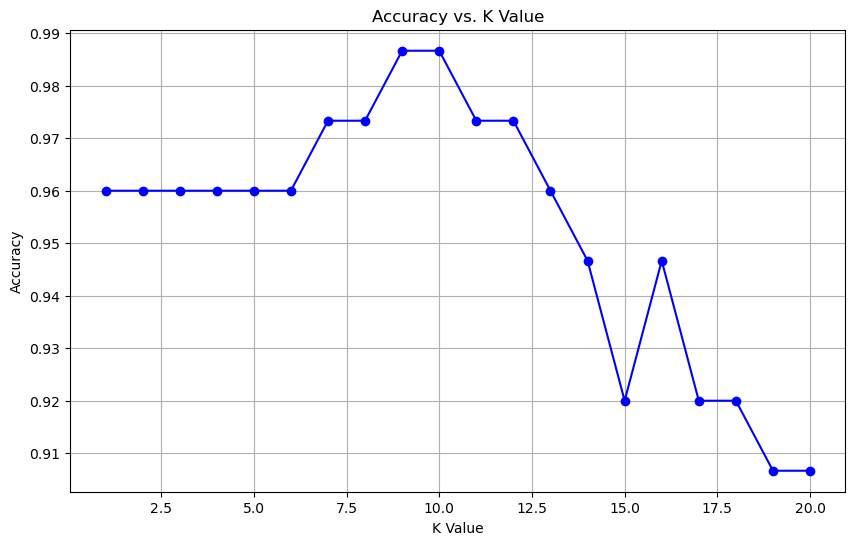

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\ACER\Desktop\DATA_SCIENCE\env\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\ACER\Desktop\DATA_SCIENCE\env\Lib\asyncio\selector_events.py", line 132, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\ACER\Desktop\DATA_SCIENCE\env\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\ACER\Desktop\DATA_SCIENCE\env\Lib\asyncio\selector_events.py", line 132, in _read_from_self
    data = self._ssock.recv

In [12]:
# Test different k values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNearestNeighbors(k=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()